<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP_MLP_Multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:ZspmrdJA7vPoERsLNONcIRZV/ukm3jsqxAm3hBpJy1M root@ca7698c4e106
The key's randomart image is:
+---[RSA 4096]----+
|  +oo..          |
| o E o           |
|o.*.. .          |
|oBo++  . .       |
| o=Boo  S        |
|.  .B* *         |
|   o+o* +        |
|    =*.=.        |
|   .o==.oo       |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-3fa83667


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQC1wuqf4+DWiaDu1GYypdqhrv8ilPqdHvYGvPB+BpCy+YGOWu8EezJylrkbg4yyL9kGqkGKBIcH0QITzSSBYH7tuDGtV584bK9ZHuxeowJbkMFp5lgq06yVT47wGvcgOS7aOoX/eV3TbxC5RxKCNlvLjxYWFtyK26gGk83/gnBk9h/rHCqmNT28rbm5+3Q9HxzM4QQkdpU4/qBmI4dji8vyGNHGLY74z9hbyCh654nHcPuhK42GYTowmfOv9JP5ru/zGy6u28bO6GaHc7wMtgIi691LCiC76FulemTMfomAiW42zhNdi/abxouqYAXb1vu9OmoAU9AyayL0hlpEO1VhQ6WOfbSwQSAB2Jm+3Y3ZIhZvBxR1/tqXno3PBfTWnWN/W5w+wAGmeYYyU4ZOHDef9pr/Vv4ODe3dlR1kbSqVKMzXJDipkOsuS8HrOIAbfK3vkRaCkpRK23Y3mUmeOLXyDGOihbZ11mXToaoFfAyEJYCReyYxg8tSaq5Yu4Lr5++U52/GQLicYV06dmGcmJY4ZWiOvnm8eB+ZBksobFgtJdWAK5qFWrIdpYtNaekawGQAJ/5JWgfsg6mN3/kvmPNbLo6tHRbrFPTpkyJbunPJNiJOfA9RyvF0z5OqichAbU2asVmo7PnQGFRoCMMOjL7v0DH9OrKQaCcxwKea5kIMpw== root@ca7698c4e106


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 145 (delta 46), reused 58 (delta 16), pack-reused 0
Receiving objects: 100% (145/145), 96.56 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (46/46), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [ ]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [ ]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install necessary libraries that might not be found
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 12.8MB 228kB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 9.1MB 42.5MB/s 
     |████████████████████████████████| 1.1MB 53.7MB/s 
     |████████████████████████████████| 460kB 53.3MB/s 
     |████████████████████████████████| 122kB 59.2MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=796f3d495e2ee7fe45a01d934e24746b591b8209e2f639e6be76771cdc273f12
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: smart-open 5.0.0
    Uninstalling smart-open-5.0.0:
      Successfully uninstalled smart-open-5.0.0
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-

     |████████████████████████████████| 93.4 MB 892 kB/s 
     |████████████████████████████████| 165.3 MB 47 kB/s 
     |████████████████████████████████| 2.1 MB 68.7 MB/s 
     |████████████████████████████████| 998 kB 67.2 MB/s 
     |████████████████████████████████| 3.3 MB 60.5 MB/s 
     |████████████████████████████████| 895 kB 69.3 MB/s 
2021-05-28 12:15:32.104470: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 778.8 MB 13 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
************************
        Versions        
************************
Tensorflow version=2.5.0
Keras version=2.5.0
Sklearn version=0.22.2.post1
Numpy version=1.19.5
Pandas version=1.1.5
Seaborn version=0.11.1
Matplotlib version=3.2.2
SpaCy version=3.0.6
Python version=3.7.10


### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [ ]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [ ]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",NaN
1,23248790229909748,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9E%E5%B8%82%E9%9B%85%E6%B3%B0%E6%B8%85%E6%B4%81%E7%94%A8%E5%93%81%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n",NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510776,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing the construction and the oil and gas industries with distinction.We try our hardest to create win-win situations and value-add to our clients with every transaction.",Holding company and also provides it_services. Company also does not seem to continue operations and hence information might be incorrect
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thailand/KANCHANABURI/11255-siam-grand-aluminum-co-ltd.html,Sales of hydraulic equipment and parts,NaN
8,116707715618748400,POLYCOM ASIA PACIFIC PTE. LTD.,SINGAPORE,NaN,tmt,telecommunication,network equipment supplier,upstream,https://www.sgpbusiness.com/company/Polycom-Asia-Pacific-Pte-Ltd,WHO

---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [ ]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [ ]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)

Total number of records: 3000
Total number of countries: 8
Total number of sectors: 15
Total number of subsectors: 34
Total number of valuechain: 20


In [ ]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE    1029
MALAYSIA      718
THAILAND      626
CHINA         315
INDONESIA     159
HONG KONG     150
VIETNAM         2
AUSTRALIA       1
Name: Country, dtype: int64

List of unique sector:
CNI                       473
OOS                       446
cni                       291
tmt                       257
CG                        229
REH                       228
IND                       211
TMT                       199
ONG                       180
oos                        97
ong                        97
ind                        21
cg                         15
reh                         6
buildings & industrial      1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 454
midstream                 373
Downstream                327
downstream                229
Midstream                 202
                          166
DOWNSTREAM                154
UPSTREAM                   71
Manufacturer               62
Ups

In [ ]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               543
building_material                    297
buildings & industrial               245
consumer electronics                 167
retail n distribution                163
petrochemical                        129
auto & mec                           124
cni_service providers                112
o&g                                   93
it_services                           90
metals and mining                     89
semiconductor                         77
residential                           77
utilities                             67
telecommunication                     55
restaurants, catering & services      52
o&g_service providers/contractors     51
fmcg                                  49
media                                 41
commercial                            34
infrastructure                        32
mixed                                 30
hotels and accommodation              27
digital_business               

In [ ]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                               543
buildings & industrial_contractor    221
building_material_manufacturer       202
consumer electronics_distributor     132
cni_service providers                112
                                    ... 
industrial gas                         1
infrastructure_developer               1
metals and mining                      1
tisp – fiber cable                     1
bunker trader                          1
Name: Archetype, Length: 89, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [ ]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities."
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n"
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments."
...,...,...,...,...,...,...,...
2995,SIN LI TECHNOLOGIES PTE LTD,SINGAPORE,ONG,o&g_service providers/contractors,o&g midstream and downstream service provider,Downstream,"MANUFACTURE AND REPAIR OF OTHER OILFIELD AND GASFIELD MACHINERY AND EQUIPMENT (EG DERRICKS, TOOL JOINTS)"
2996,SEE TONG LEE LIMITED PARTNERSHIP,THAILAND,IND,metals and mining,steel distributor,distributor,"Business scene, advertising stage. And sells aluminum sheets, steel sheets"
2997,"SHENZHEN XIONGFENG STEEL STRUCTURE CO.,LTD",CHINA,IND,metals and mining,steel fabricator,Manufacturer,"Shenzhen HX Steel Structure company is one of the largest steel structure fabricator in South- China area. Owing three manufacturing bases separated in Shenzhen、 Dongguan and Huizhou, our annual producing capacity is 30,000 tons.More>>"
2998,"NANTONG CHENGSHI HEAVYINDUSTRY DEVELOP CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [ ]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
13,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
35,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
62,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
79,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2969,SPK MW LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
2978,"GUANGXI RONGXIAN LIN YANGBAN INDUSTRY CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
2985,JOHANES PRAYITNO PRASETYA,INDONESIA,NaN,NaN,NaN,NaN,NaN
2998,"NANTONG CHENGSHI HEAVYINDUSTRY DEVELOP CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN


In [ ]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities."
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.\n"
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008.\nSince then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services"
...,...,...,...,...,...,...,...
2993,"MENG HENG CO.,LTD.",THAILAND,OOS,others,others,NaN,Entertainment Affairs
2994,HIN TATT RECYCLING SDN. BHD.,MALAYSIA,OOS,others,others,NaN,"DEALER, MERCHANT AND RECYCLING IN ALL KINDS OF SCRAP MATERIAL, SCRAP METAL AND PAPER, TRANSPORTATION AND OTHER RELATED BUSINESS"
2995,SIN LI TECHNOLOGIES PTE LTD,SINGAPORE,ONG,o&g_service providers/contractors,o&g midstream and downstream service provider,Downstream,"MANUFACTURE AND REPAIR OF OTHER OILFIELD AND GASFIELD MACHINERY AND EQUIPMENT (EG DERRICKS, TOOL JOINTS)"
2996,SEE TONG LEE LIMITED PARTNERSHIP,THAILAND,IND,metals and mining,steel distributor,distributor,"Business scene, advertising stage. And sells aluminum sheets, steel sheets"


In [ ]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 2756


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

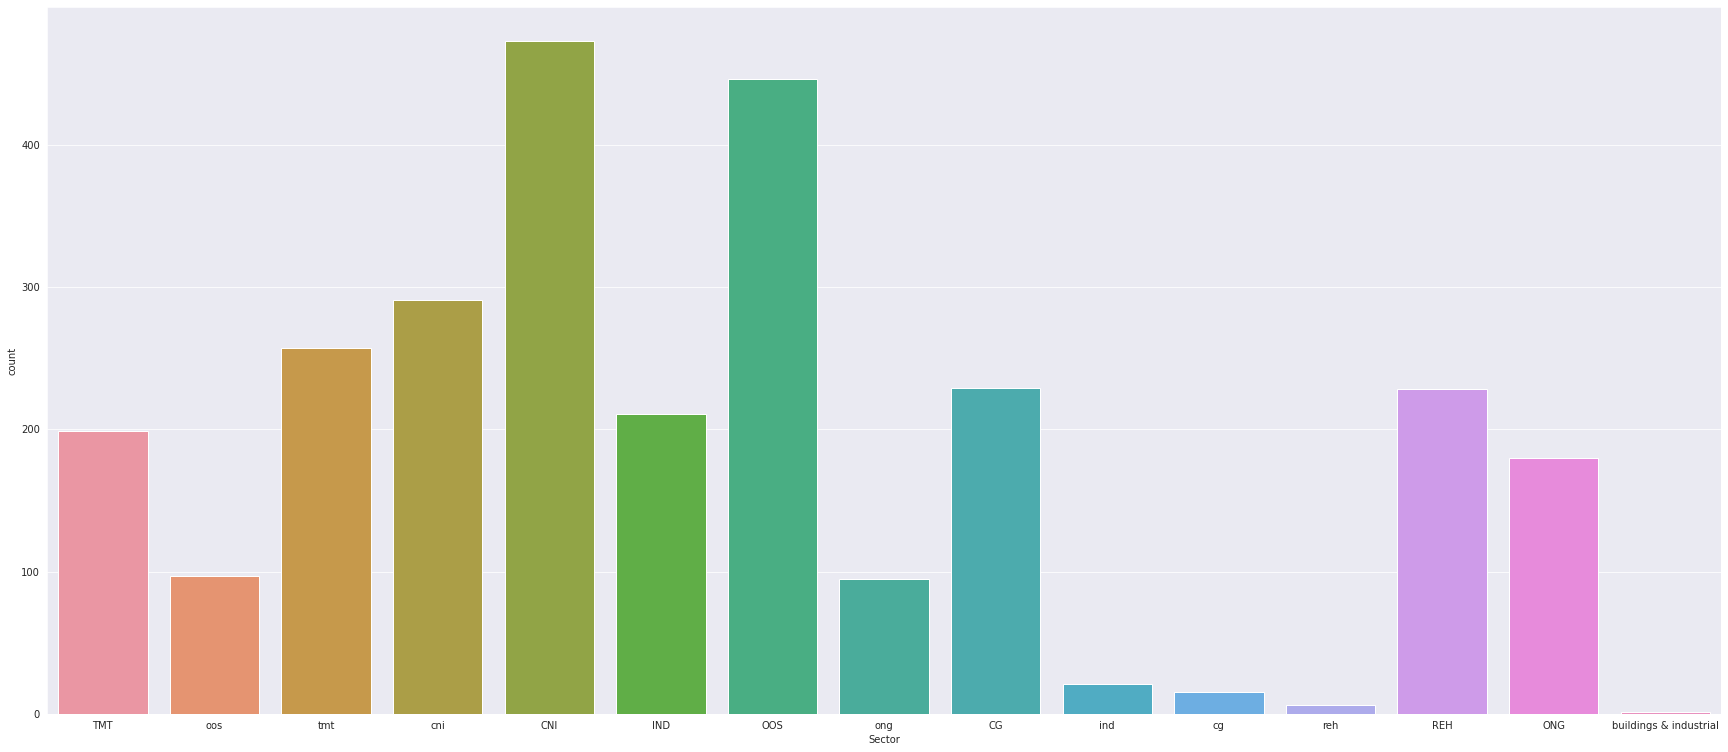

In [ ]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

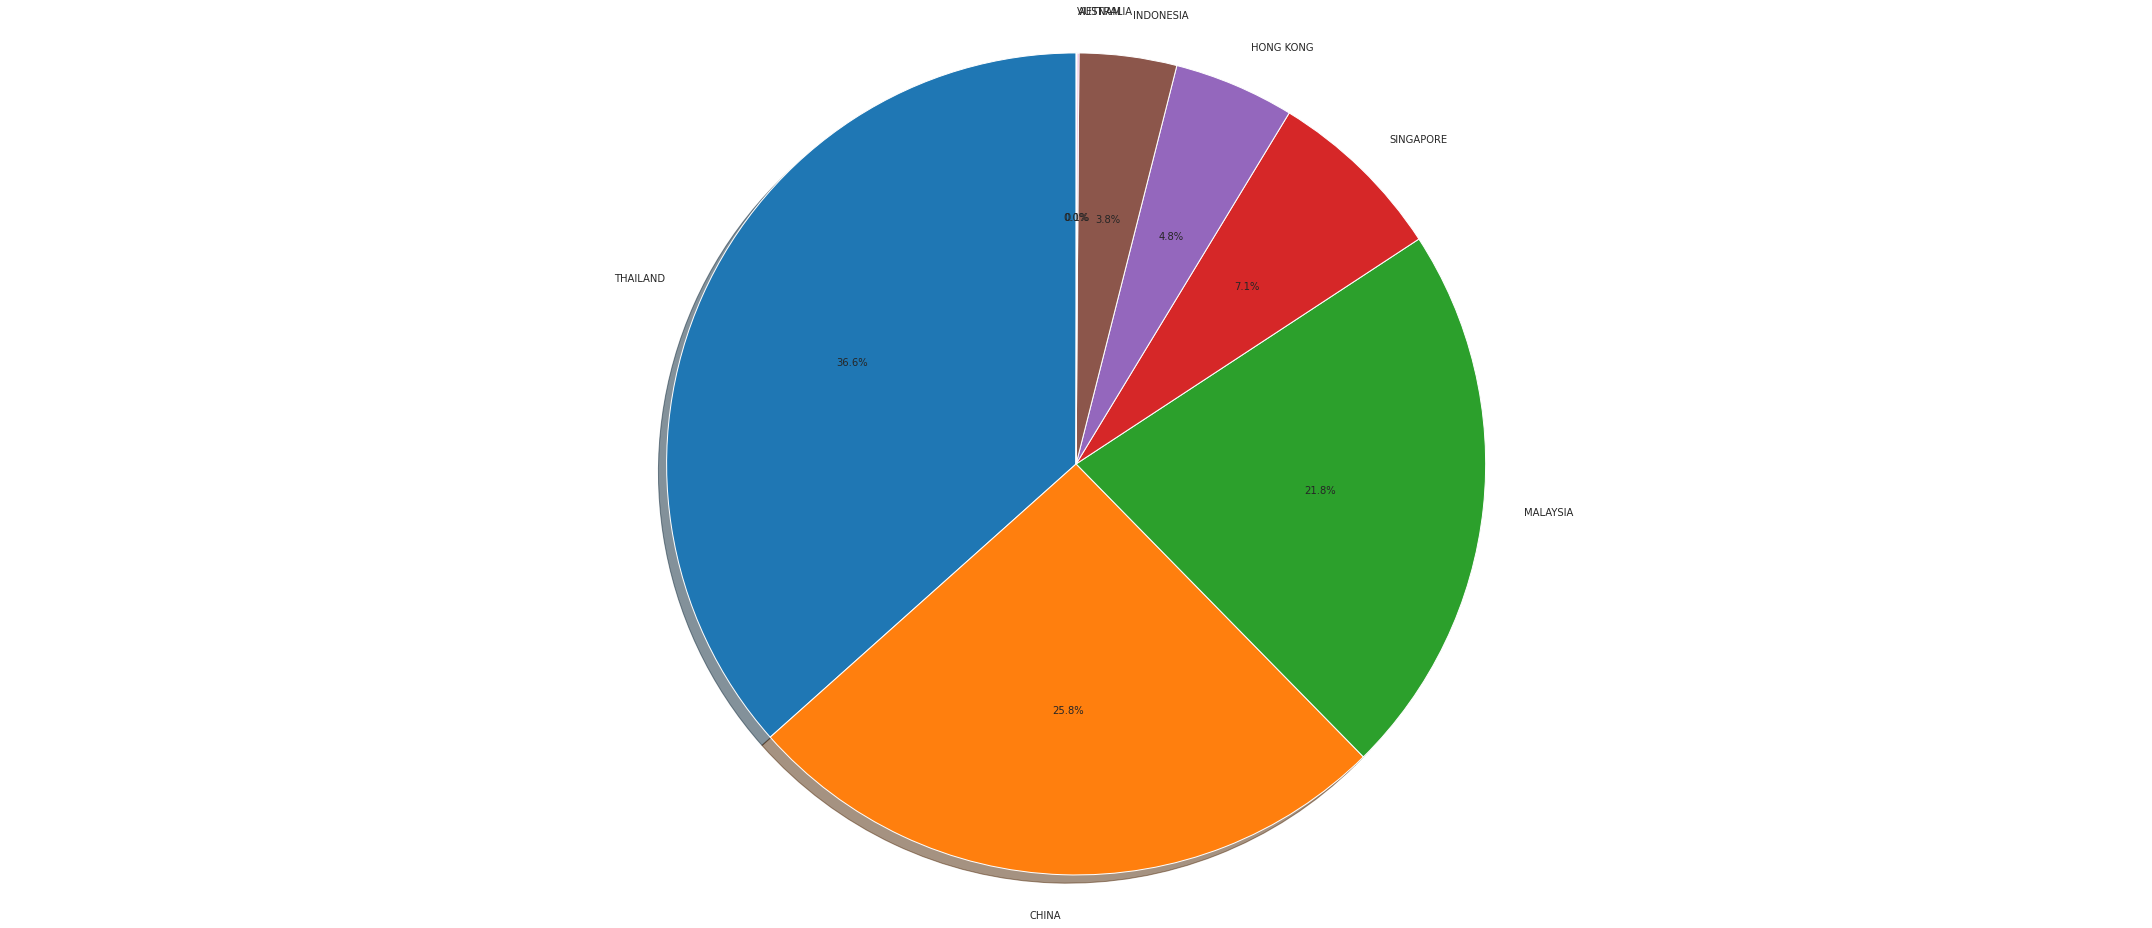

In [ ]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [ ]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                    Yatai's main products cover various cleaning machinery, cleaning agents, cl

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [ ]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                     Yatai's main products cover various cleaning machinery, cleaning agents, c

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [ ]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


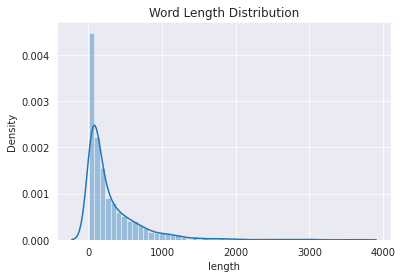

In [ ]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [ ]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
...,...,...,...,...,...,...,...,...
366,SHOPEE HONG KONG LIMITED,HONG KONG,tmt,digital_business,digital_business,midstream,"Shopee is the leading e-commerce platform in Southeast Asia and Taiwan. It is a platform tailored for the region, providing customers with an easy, secure and fast online shopping experience through strong payment and logistical support. Shopee aims to continually enhance its platform and become the region’s e-commerce destination of choice. Shopee has a wide selection of product categories ranging from consumer electronics to home & living, health & beauty, baby & toys, fashion and fitness equipment. Shopee, a Sea company, was first launched in Singapore in 2015, and has since expanded its reach to Malaysia, Thailand, Taiwan, Indonesia, Vietnam and the Philippines. Sea is a leader in digital entertainment, e-commerce and digital financial services across Greater Southeast Asia. Sea’s mission is to better the lives of consumers and small businesses with technology, and is listed on the NYSE under the symbol SE.",924.0
367,M-LINK SYSTEM (M) SDN. BHD.,MALAYSIA,tmt,consumer electronics,consumer electronics_distributor,downstream,"Formed in 1989, and with the rapid growth, the company has incorporated in 1994 as M-LINK SYSTEM (M) SDN BHD, with its headquarter in Petaling Jaya, Selangor and 7 branches located at strategic and important network points of Malaysia. M-Link System (M) Sdn Bhd has forged

### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [ ]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
2993,"MENG HENG CO.,LTD.",THAILAND,OOS,others,others,,Entertainment Affairs,21
2994,HIN TATT RECYCLING SDN. BHD.,MALAYSIA,OOS,others,others,,"DEALER, MERCHANT AND RECYCLING IN ALL KINDS OF SCRAP MATERIAL, SCRAP METAL AND PAPER, TRANSPORTATION AND OTHER RELATED BUSINESS",127
2995,SIN LI TECHNOLOGIES PTE LTD,SINGAPORE,ONG,o&g_service providers/contractors,o&g midstream and downstream service provider,Downstream,"MANUFACTURE AND REPAIR OF OTHER OILFIELD AND GASFIELD MACHINERY AND EQUIPMENT (EG DERRICKS, TOOL JOINTS)",104
2996,SEE TONG LEE LIMITED PARTNERSHIP,THAILAND,IND,metals and mining,steel distributor,distributor,"Business scene, advertising stage. And sells aluminum sheets, steel sheets",74


### 4.5. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [ ]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())

# save counts for use in model
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


In [ ]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        print(row, '\n')
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

(2747, 9)

### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [ ]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [ ]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []

    # filter through each token and add to preprocessed text if requirements #
    # met.                                                                   #
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.upper())

    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess>

In [ ]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

In [ ]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEANING, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATED, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LED, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]"
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,TMT,it_services,it_services,MIDSTREAM,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593,"[6, 17, 46, 5]","[TONGDUN, TECHNOLOGY, PROFESSIONAL, THIRD-PARTY, INTELLIGENT, RISK, MANAGEMENT, DECISION-MAKING, SERVICE, PROVIDER, HEADQUARTER, HANGZHOU, ZHEJIANG, INTEGRATE, ARTIFICIAL, INTELLIGENCE, BUSINESS, SCENARIO, TONGDUN, TECHNOLOGY, OFFER, SOLUT

### 4.7. Bag of Words / TF-IDF

In [ ]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1473


In [ ]:
# do bag of words
bow_vectors = []
for index, row in df_valid.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1

    # append to dataframe
    bow_vectors.append(list(dictionary.values()))

    # print(f'{sum(dictionary.values()):>3}/{len(dictionary.values()):<3} |', dictionary.values())

df_valid['BoW_vectors'] = bow_vectors

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,BoW_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEANING, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATED, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LED, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]","

In [ ]:
# clean up BoW data 
temp = 0
for index, row in df_valid.iterrows():
    if sum(row['BoW_vectors']) < 1:
        df_valid.drop(index, inplace=True)

df_valid.shape

(2001, 11)

# 5.Models
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

In [ ]:
import keras

print('--- Version Checking ---')
print("Keras:", keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [ ]:
# split datasets to train and test
distribution = int(df_valid.shape[0] * 0.9)

df_valid = df_valid.sample(frac=1)

df_train = df_valid.iloc[:distribution]
df_test = df_valid.iloc[distribution:]

df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

X_train = np.array(list(df_train['BoW_vectors']))
y_train = np.array(list(df_train['list_tag']))

X_test = np.array(list(df_test['BoW_vectors']))
y_test = np.array(list(df_test['list_tag']))

In [ ]:
# create multi-output model
from keras.layers import Dense, Input, Dropout
from keras import Model

# function to build model branches
def multi_branch(x, name, input_dim, output_dim, dropout_rate):
    x = Dense(input_dim // 2, activation='relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(input_dim // 4, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    
    x = Dense(input_dim // 8, activation='relu')(x)
    x = Dropout(dropout_rate)(x)

    # output
    output = Dense(output_dim, name=name, activation='softmax')(x)

    return output

def create_multilabel(labels, labels_output_dim, input_dim, dropout_rate=0.2):
    # check labels
    assert len(labels) == len(labels_output_dim)

    input_layer = Input(input_dim)

    # group 1 dense layers
    group_1 = Dense(input_dim, activation='relu')(input_layer)
    group_1 = Dense(input_dim // 1.5, activation='relu')(group_1)

    # multilabel branches
    branches = []
    for i in range(len(labels)):
        branches.append(multi_branch(group_1, labels[i], input_dim, labels_output_dim[i], dropout_rate))

    # put model together
    model = Model(inputs=input_layer, outputs=branches, name='company_classification_model')

    return model

# one hot 
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

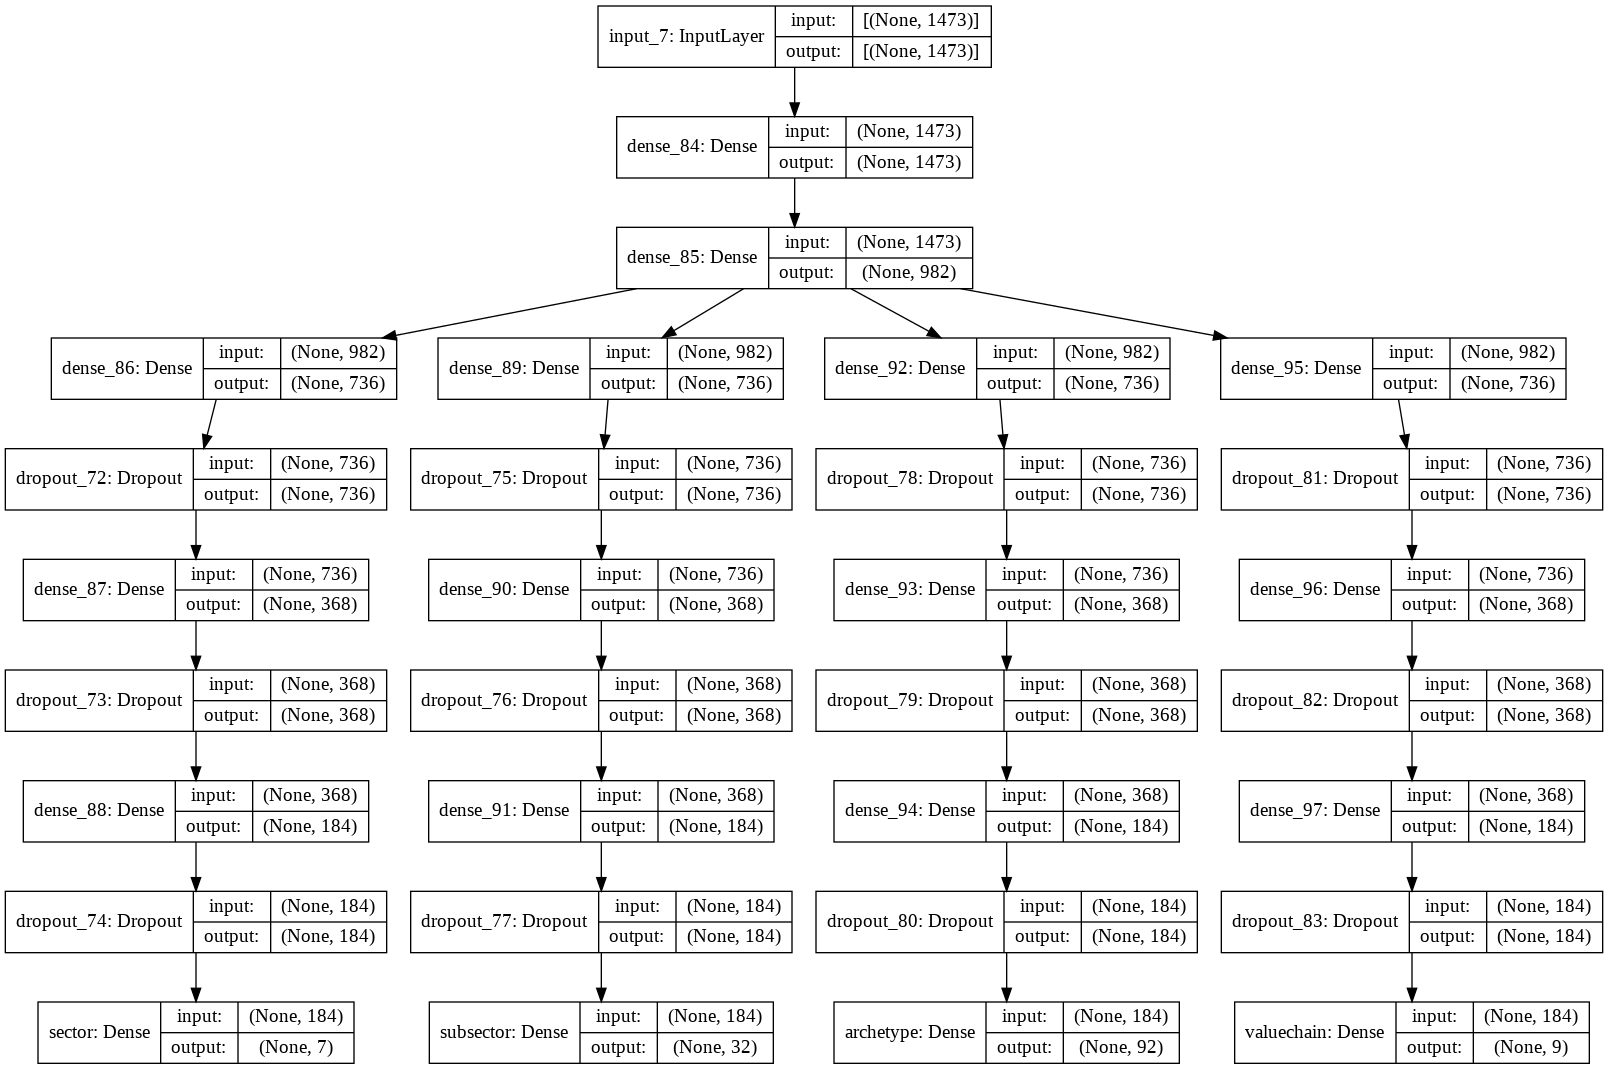

In [ ]:
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

model = create_multilabel(label_names, tag_counts, len(keywords_masterlist))

tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# preprocess labels before training
y_train_multi = {label_names[0] : one_hot(y_train[:,0], tag_counts[0]),
                 label_names[1] : one_hot(y_train[:,1], tag_counts[1]),
                 label_names[2] : one_hot(y_train[:,2], tag_counts[2]),
                 label_names[3] : one_hot(y_train[:,3], tag_counts[3]),
                 }
y_test_multi = {label_names[0] : one_hot(y_test[:,0], tag_counts[0]),
                label_names[1] : one_hot(y_test[:,1], tag_counts[1]),
                label_names[2] : one_hot(y_test[:,2], tag_counts[2]),
                label_names[3] : one_hot(y_test[:,3], tag_counts[3]),
                }

losses = {i : 'categorical_crossentropy' for i in label_names}

In [ ]:
model.compile(optimizer='adam', loss=losses, metrics=['accuracy'])
history = model.fit(X_train, y_train_multi, epochs=50, batch_size=20)

Epoch 1/50
90/90 [==============================] - 4s 8ms/step - loss: 10.2365 - sector_loss: 1.6833 - subsector_loss: 2.9862 - archetype_loss: 3.8761 - valuechain_loss: 1.6909 - sector_accuracy: 0.3712 - subsector_accuracy: 0.2205 - archetype_accuracy: 0.1822 - valuechain_accuracy: 0.4025
Epoch 2/50
90/90 [==============================] - 1s 7ms/step - loss: 7.7369 - sector_loss: 1.1708 - subsector_loss: 2.2212 - archetype_loss: 3.0339 - valuechain_loss: 1.3110 - sector_accuracy: 0.6236 - subsector_accuracy: 0.3918 - archetype_accuracy: 0.2969 - valuechain_accuracy: 0.5141
Epoch 3/50
90/90 [==============================] - 1s 7ms/step - loss: 5.9039 - sector_loss: 0.7916 - subsector_loss: 1.6615 - archetype_loss: 2.4120 - valuechain_loss: 1.0388 - sector_accuracy: 0.7556 - subsector_accuracy: 0.5365 - archetype_accuracy: 0.4215 - valuechain_accuracy: 0.6098
Epoch 4/50
90/90 [==============================] - 1s 7ms/step - loss: 5.0592 - sector_loss: 0.6537 - subsector_loss: 1.3874 

### 5.2 Testing Models

In [ ]:
metrics = model.evaluate(X_test, y_test_multi, verbose=0)[1:]

for i, label in enumerate(label_names):
    print(f'{label} accuracy: {metrics[i+4] * 100:.5}%')
    print(f'{label} loss: {metrics[i]:.5}')

sector accuracy: 67.164%
sector loss: 3.1423
subsector accuracy: 50.249%
subsector loss: 3.9571
archetype accuracy: 38.806%
archetype loss: 5.6611
valuechain accuracy: 54.726%
valuechain loss: 4.0172


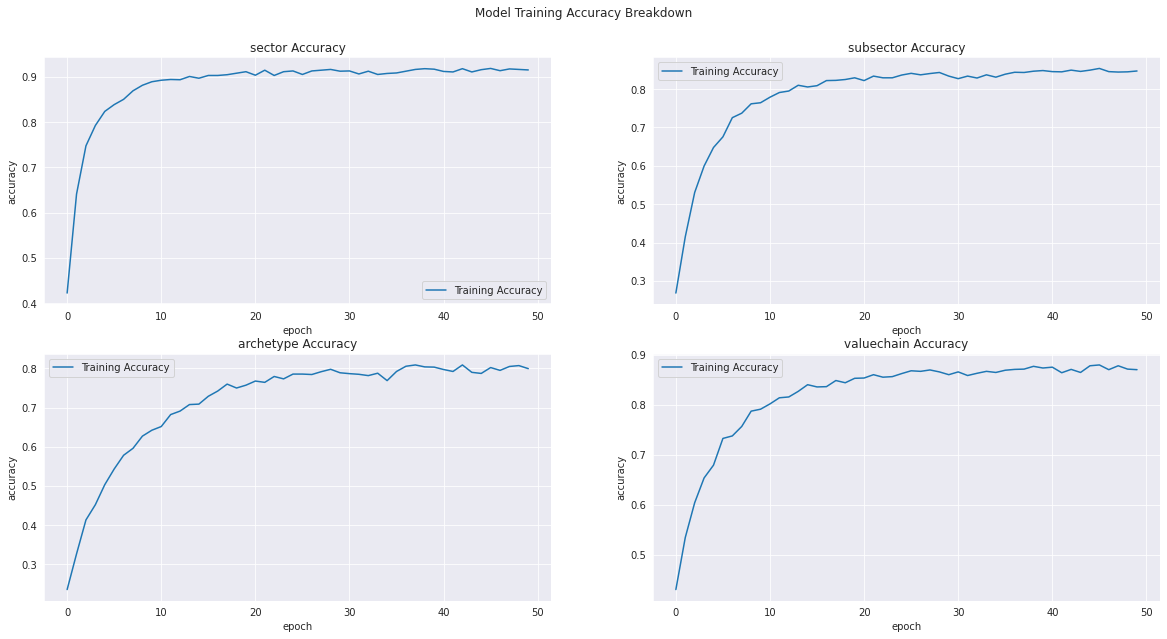

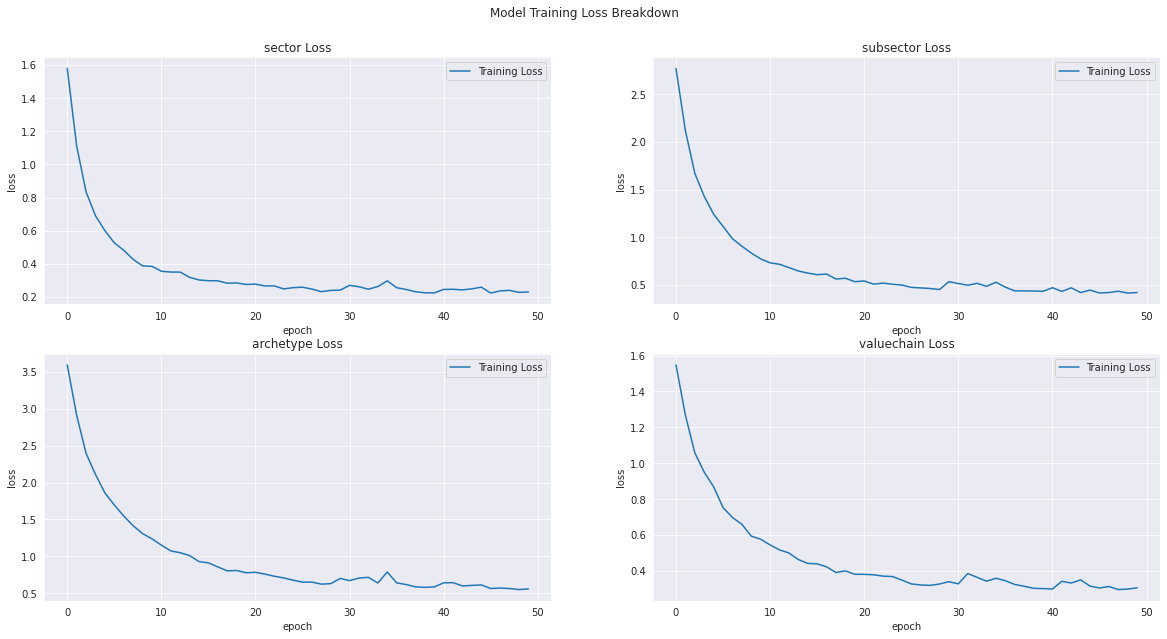

In [ ]:
# plot accuracy and loss graphs for all labels
fig = plt.figure(1, figsize=(20,10))
plt.suptitle('Model Training Accuracy Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[f'{name}_accuracy'])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy'])

fig = plt.figure(2, figsize=(20,10))
plt.suptitle('Model Training Loss Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[f'{name}_loss'])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

plt.show()

In [ ]:
results = model.predict(X_test)

predicted_label = []
for label in results:
    predicted_label.append(np.argmax(label, axis = 1))
predicted_label = np.array(predicted_label)

for i in range(predicted_label.shape[1]):
    print(f'Expected: {y_test[i]} | got {predicted_label[:,i]}')

Expected: [1 3 8 5] | got [1 3 8 5]
Expected: [ 6 17 46  5] | got [ 6 17 64  5]
Expected: [ 1  4 10  5] | got [ 1  4 10  5]
Expected: [ 0 11 65  5] | got [ 0 11 64  5]
Expected: [ 1  4 10  5] | got [ 1  4 10  5]
Expected: [ 1  4 10  5] | got [ 1  4 10  5]
Expected: [ 1 15 40  5] | got [ 1  4 10  5]
Expected: [ 5 20 51  0] | got [ 5 20 75  7]
Expected: [ 4 24 64  0] | got [ 4 24 64  7]
Expected: [1 3 8 5] | got [ 1  4 10  5]
Expected: [ 5 26 75  7] | got [ 5 24 76  0]
Expected: [ 0 28 18  3] | got [ 4 24 64  0]
Expected: [ 6  8 20  3] | got [ 6 17 46  5]
Expected: [ 0 28 18  3] | got [1 3 9 3]
Expected: [ 5 13 32  5] | got [ 5 24 32  5]
Expected: [1 3 8 5] | got [ 1 24 90  5]
Expected: [1 3 8 5] | got [1 3 8 5]
Expected: [ 0 28 66  3] | got [ 0 11 65  0]
Expected: [1 3 8 5] | got [1 3 8 5]
Expected: [ 1  4 10  5] | got [ 1  4 10  5]
Expected: [ 3 25 70  8] | got [ 3 25 70  8]
Expected: [ 3 25 70  8] | got [ 3 25 69  3]
Expected: [ 4 24 64  0] | got [ 0 18 49  5]
Expected: [ 1  6 14  5] 

### 5.3. Saving Models

In [ ]:
# save models to file
model.save('./multilabel_model')

INFO:tensorflow:Assets written to: ./multilabel_model/assets


In [ ]:
!zip -r multilabel_model.zip ./multilabel_model

  adding: multilabel_model/ (stored 0%)
  adding: multilabel_model/assets/ (stored 0%)
  adding: multilabel_model/keras_metadata.pb (deflated 94%)
  adding: multilabel_model/saved_model.pb (deflated 91%)
  adding: multilabel_model/variables/ (stored 0%)
  adding: multilabel_model/variables/variables.data-00000-of-00001 (deflated 25%)
  adding: multilabel_model/variables/variables.index (deflated 75%)


---
---
---

# 6.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

